In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading CSV file
cc_data = pd.read_csv("creditcard.csv")
cc_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
#Checking for missing values
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
for i, (x,y) in enumerate(zip(cc_data.min() , cc_data.max())):
                          print (x,y)

0.0 172792.0
-56.4075096313 2.45492999121
-72.7157275629 22.0577289905
-48.3255893624 9.38255843282
-5.68317119817 16.8753440336
-113.743306711 34.8016658767
-26.1605059358 73.301625546
-43.5572415712 120.589493945
-73.2167184553 20.0072083651
-13.4340663182 15.5949946071
-24.5882624372 23.7451361207
-4.7974734648 12.0189131816
-18.6837146333 7.84839207564
-5.79188120632 7.12688295859
-19.2143254903 10.5267660518
-4.49894467677 8.87774159774
-14.1298545175 17.3151115176
-25.1627993693 9.25352625047
-9.49874592105 5.04106918541
-7.21352743018 5.59197142734
-54.4977204946 39.4209042482
-34.8303821448 27.2028391573
-10.9331436977 10.5030900899
-44.8077352038 22.5284116898
-2.8366269187 4.5845491369
-10.295397075 7.51958867871
-2.60455055281 3.51734561162
-22.5656793208 31.6121981061
-15.4300839055 33.8478078189
0.0 25691.16
0.0 1.0


In [31]:
#Dividing Data
X = cc_data.drop(["Class","Time"], axis = 1)
y = cc_data["Class"]

# UnderSampling Data

In [32]:
class1_len = y.value_counts()[1]

In [33]:
class1_index = y[y==1].index

In [34]:
class0_index = y[y==0].index

In [35]:
class0_random = np.random.choice(class0_index,class1_len,replace = False)

In [36]:
index = np.concatenate([class0_random,class1_index])

In [37]:
X_under = X.iloc[index,:].values

In [38]:
y_under = y.iloc[index].values

In [39]:
len(y_under[y_under==0]), len(y_under)

(492, 984)

In [40]:
from sklearn.model_selection import train_test_split
X_under_train,X_under_test,y_under_train,y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_under_train = std.fit_transform(X_under_train)
X_under_test = std.transform(X_under_test)
X_std = std.transform(X)

In [42]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 10, test_size = 0.2)

# Logistic Regression

In [17]:
recall_l1 = []
roc_auc_l1 = []
C_param = [0.01,0.1,1,10,100]
for c in C_param:
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression(C = c, penalty = "l1")
    log_reg.fit(X_under_train,y_under_train)
    y_pred = log_reg.predict(X_under_test) 
    from sklearn.metrics import recall_score,roc_auc_score
    recall = recall_score(y_under_test,y_pred)
    roc_auc = roc_auc_score(y_under_test,y_pred)
    recall_l1.append(recall)
    roc_auc_l1.append(roc_auc)

In [18]:
log_reg_tabel = pd.DataFrame({"recall_score_l1":recall_l1,"roc_auc_score_l1":roc_auc_l1}, index =[0.01,0.1,1,10,100])
log_reg_tabel.index.name = "C values"
log_reg_tabel

,recall_score_l1,roc_auc_score_l1
C values,,
0.01,0.751678,0.872438
0.10,0.838926,0.912660
1.00,0.892617,0.932703
10.00,0.912752,0.939369
100.00,0.906040,0.942816


In [19]:
C_param = [0.01,0.1,1,10,100]
recall_l2 = []
roc_auc_l2 = []
for c in C_param:
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression(C = c, penalty = "l2")
    log_reg.fit(X_under_train,y_under_train)
    y_pred = log_reg.predict(X_under_test)
    from sklearn.metrics import recall_score,roc_auc_score
    recall = recall_score(y_under_test,y_pred)
    roc_auc = roc_auc_score(y_under_test,y_pred)
    recall_l2.append(recall)
    roc_auc_l2.append(roc_auc)
    

In [20]:
log_reg_tabel["recall_score_l2"] = recall_l2
log_reg_tabel["roc_auc_l2"] = roc_auc_l2
log_reg_tabel

,recall_score_l1,roc_auc_score_l1,recall_score_l2,roc_auc_l2
C values,,,,
0.01,0.751678,0.872438,0.758389,0.879195
0.10,0.838926,0.912660,0.838926,0.916062
1.00,0.892617,0.932703,0.879195,0.925992
10.00,0.912752,0.939369,0.899329,0.936059
100.00,0.906040,0.942816,0.906040,0.939415


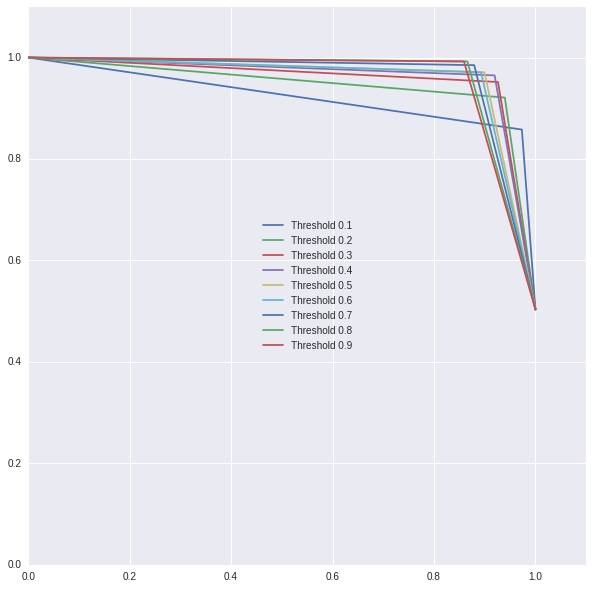

In [25]:
#Analysing Precision-recall curve for these values of C and penalty
Threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
from sklearn.linear_model import LogisticRegression
log_reg_best = LogisticRegression(C = 10, penalty = "l2")
log_reg_best.fit(X_under_train,y_under_train)
y_pred_prob = log_reg_best.predict_proba(X_under_test)
plt.figure(figsize = (10,10))
for i in Threshold :
    y_pred = y_pred_prob[:,1] > i
    from sklearn.metrics import precision_recall_curve
    precision,recall, thresholds = precision_recall_curve(y_true = y_under_test,probas_pred = y_pred)
    plt.plot(recall,precision, label = "Threshold %s"%i)
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    plt.legend(loc = "center")

In [22]:
y_pred = y_pred_prob[:,1] > 0.3
from sklearn.metrics import precision_recall_curve
precision,recall, thresholds = precision_recall_curve(y_true = y_under_test,probas_pred = y_pred)
precision,recall, thresholds

(array([ 0.50337838,  0.95172414,  1.        ]),
 array([ 1.       ,  0.9261745,  0.       ]),
 array([False,  True], dtype=bool))

In [34]:
#Using this to check on entire X
from sklearn.linear_model import LogisticRegression
log_reg_best = LogisticRegression(C = 10, penalty = "l2")
log_reg_best.fit(X_under_train,y_under_train)
y_pred_total = log_reg_best.predict_proba(X_std)
y_pred = y_pred_total[:,1] > 0.3
from sklearn.metrics import precision_recall_curve
precision,recall, thresholds = precision_recall_curve(y_true = y,probas_pred = y_pred)
precision, recall, thresholds

(array([ 0.00172749,  0.02342205,  1.        ]),
 array([ 1.        ,  0.93902439,  0.        ]),
 array([False,  True], dtype=bool))

# KNN Classifier

In [63]:
n = range(1,30)
recall_uniform = []
roc_auc_uniform = []
score_uniform = []
for i in n :
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = i, weights = "uniform")
    knn.fit(X_under_train,y_under_train)
    y_pred = knn.predict(X_under_test)
    score = knn.score(X_under_test,y_under_test)
    from sklearn.metrics import recall_score,roc_auc_score
    recall = recall_score(y_under_test,y_pred)
    roc_auc = roc_auc_score(y_under_test,y_pred)
    recall_uniform.append(recall)
    roc_auc_uniform.append(roc_auc)
    score_uniform.append(score)

In [72]:
knn_tabel = pd.DataFrame({"recall_uniform":recall_uniform,"roc_auc_score_uniform":roc_auc_uniform}, index =range(1,30))
knn_tabel.index.name = "n_neighbors"
knn_tabel["score_uniform"] = score_uniform

In [73]:
n = range(1,30)
recall_distance = []
roc_auc_distance = []
score_distance = []
for i in n :
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = i, weights = "distance")
    knn.fit(X_under_train,y_under_train)
    y_pred = knn.predict(X_under_test)
    score = knn.score(X_under_test,y_under_test)
    from sklearn.metrics import recall_score,roc_auc_score
    recall = recall_score(y_under_test,y_pred)
    roc_auc = roc_auc_score(y_under_test,y_pred)
    recall_distance.append(recall)
    roc_auc_distance.append(roc_auc)
    score_distance.append(score)

In [74]:
knn_tabel["recall_distance"] = recall_distance
knn_tabel["roc_auc_score_distance"] = roc_auc_distance
knn_tabel["score_distance"] = score_distance
knn_tabel

,recall_uniform,roc_auc_score_uniform,score_uniform,recall_distance,roc_auc_score_distance,score_distance
n_neighbors,,,,,,
1,0.865772,0.912478,0.912162,0.865772,0.912478,0.912162
2,0.812081,0.906040,0.905405,0.865772,0.912478,0.912162
3,0.845638,0.912615,0.912162,0.845638,0.912615,0.912162
4,0.805369,0.895882,0.895270,0.852349,0.915970,0.915541
5,0.825503,0.905949,0.905405,0.825503,0.905949,0.905405
6,0.805369,0.899283,0.898649,0.825503,0.909350,0.908784
7,0.825503,0.905949,0.905405,0.825503,0.905949,0.905405
8,0.812081,0.902639,0.902027,0.832215,0.912706,0.912162
9,0.812081,0.902639,0.902027,0.818792,0.905995,0.905405


In [75]:
knn_tabel.max()

recall_uniform            0.865772
roc_auc_score_uniform     0.912615
score_uniform             0.912162
recall_distance           0.865772
roc_auc_score_distance    0.915970
score_distance            0.915541
dtype: float64

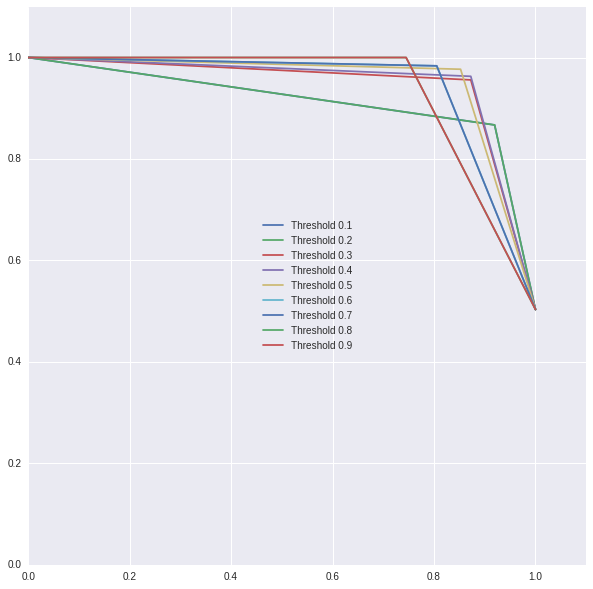

In [77]:
#Checking for optimum threshold
Threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
from sklearn.neighbors import KNeighborsClassifier
knn_best = KNeighborsClassifier(n_neighbors = 4, weights = "distance")
knn_best.fit(X_under_train,y_under_train)
y_pred = knn_best.predict(X_under_test)
y_pred_prob = knn_best.predict_proba(X_under_test)
plt.figure(figsize = (10,10))
precision_knn = []
recall_knn = []
for i in Threshold :
    y_pred = y_pred_prob[:,1] > i
    from sklearn.metrics import precision_recall_curve
    precision,recall, thresholds = precision_recall_curve(y_true = y_under_test,probas_pred = y_pred)
    precision_knn.append(precision[1])
    recall_knn.append(recall[1])
    plt.plot(recall,precision, label = "Threshold %s"%i)
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    plt.legend(loc = "center")

In [78]:
knn_best_tabel = pd.DataFrame({"precision":precision_knn,"recall":recall_knn}, index = Threshold)
knn_best_tabel.index.name = "Threshold Values"
knn_best_tabel

,precision,recall
Threshold Values,,
0.1,0.867089,0.919463
0.2,0.867089,0.919463
0.3,0.955882,0.872483
0.4,0.962963,0.872483
0.5,0.976923,0.852349
0.6,0.983607,0.805369
0.7,0.983607,0.805369
0.8,1.000000,0.744966
0.9,1.000000,0.744966


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_best = KNeighborsClassifier(n_neighbors = 4, weights = "distance")
knn_best.fit(X_under_train,y_under_train)
y_pred_prob = knn_best.predict_proba(X_std)
y_pred = y_pred_prob[:,1] > 0.2
from sklearn.metrics import precision_recall_curve
precision,recall, thresholds = precision_recall_curve(y_true = y,probas_pred = y_pred)
precision[1], recall[1]

(0.0074740034662045063, 0.98170731707317072)

In [16]:
knn_best.score(X_std,y)

0.97149648709476943

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,knn_best.predict(X_std))

In [18]:
cm

array([[276219,   8096],
       [    22,    470]])

In [20]:
1 - cm[0,1]/cm[0].sum()

0.97152454144171074

# Random Forest Classifier

In [21]:
n_estimators = range(1,100)
recall = []
roc_score = []
for n in n_estimators:
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators = n)
    rfc.fit(X_under_train,y_under_train)
    y_pred = rfc.predict(X_under_test)
    from sklearn.metrics import recall_score,roc_auc_score
    rec = recall_score(y_under_test,y_pred)
    roc = roc_auc_score(y_under_test,y_pred)
    recall.append(rec)
    roc_score.append(roc)

In [22]:
rfc_tabel = pd.DataFrame({"recall":recall,"roc_auc_score":roc_score})

In [26]:
rfc_tabel.sort_values(by = "recall", ascending = False, inplace = True)

In [27]:
rfc_tabel

,recall,roc_auc_score
2,0.919463,0.935922
6,0.912752,0.922362
68,0.912752,0.935968
48,0.912752,0.935968
80,0.906040,0.932612
93,0.906040,0.936013
97,0.906040,0.932612
46,0.906040,0.936013
58,0.906040,0.939415
38,0.906040,0.932612


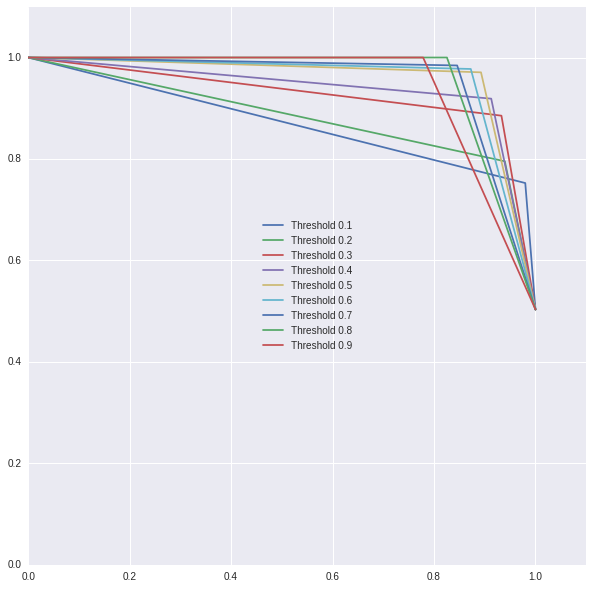

In [64]:
#Optimizing Threshold value
Threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
from sklearn.ensemble import RandomForestClassifier
rfc_best = RandomForestClassifier(n_estimators = 49)
rfc_best.fit(X_under_train,y_under_train)
y_pred = rfc_best.predict(X_under_test)
y_pred_prob = rfc_best.predict_proba(X_under_test)
plt.figure(figsize = (10,10))
precision_rfc = []
recall_rfc = []
for i in Threshold :
    y_pred = y_pred_prob[:,1] > i
    from sklearn.metrics import precision_recall_curve
    precision,recall, thresholds = precision_recall_curve(y_true = y_under_test,probas_pred = y_pred)
    precision_rfc.append(precision[1])
    recall_rfc.append(recall[1])
    plt.plot(recall,precision, label = "Threshold %s"%i)
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    plt.legend(loc = "center")

In [65]:
rfc_best_tabel = pd.DataFrame({"precision":precision_rfc,"recall":recall_rfc}, index = Threshold)
rfc_best_tabel.index.name = "Threshold Values"
rfc_best_tabel

,precision,recall
Threshold Values,,
0.1,0.752577,0.979866
0.2,0.795455,0.939597
0.3,0.885350,0.932886
0.4,0.918919,0.912752
0.5,0.970803,0.892617
0.6,0.977444,0.872483
0.7,0.984375,0.845638
0.8,1.000000,0.825503
0.9,1.000000,0.778523


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc_best = RandomForestClassifier(n_estimators = 49)
rfc_best.fit(X_under_train,y_under_train)
y_pred = rfc_best.predict(X_std)
y_pred_prob = rfc_best.predict_proba(X_std)
y_pred = y_pred_prob[:,1] > 0.3
from sklearn.metrics import precision_recall_curve
precision,recall, thresholds = precision_recall_curve(y_true = y,probas_pred = y_pred)
precision[1], recall[1]

(0.016210060955187889, 0.98373983739837401)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,rfc_best.predict(X_std))

In [45]:
cm

array([[275996,   8319],
       [    16,    476]])

In [46]:
rfc_best.score(X_std,y)

0.97073456761947563

# SVM Models

In [22]:
from sklearn.svm import SVC
svc = SVC(kernel = "rbf")

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {"kernel":["rbf"], "C":[0.01,0.1,1,10,100], "gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],"random_state":[0]}
svc_model =GridSearchCV(svc,parameters,cv = cv)
svc_model.fit(X_under_train,y_under_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'random_state': [0], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
svc_model.best_score_

0.92971014492753623

In [26]:
svc_model.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0}

In [33]:
C = [0.01,0.1,1,10,100]
for c in C:
    recall = []
    roc = []
    gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
    for g in gamma :
        from sklearn.svm import SVC
        svc = SVC(kernel = "rbf", C = c, gamma = g,random_state = 0)
        svc.fit(X_under_train,y_under_train)
        y_pred = svc.predict(X_under_test)
        from sklearn.metrics import recall_score,roc_auc_score
        rec = recall_score(y_under_test,y_pred)
        roc_auc = roc_auc_score(y_under_test,y_pred)
        recall.append(rec)
        roc.append(roc_auc)
    svc_tabel = pd.DataFrame({"recall":recall,"roc":roc}, index = gamma)
    svc_tabel.index.name = "gamma with C = %s"%c
    svc_tabel.sort_values(by = "recall", inplace = True)
    print (svc_tabel)

                       recall       roc
gamma with C = 0.01                    
0.2                  0.000000  0.500000
0.3                  0.000000  0.500000
0.4                  0.000000  0.500000
0.5                  0.000000  0.500000
0.6                  0.000000  0.500000
0.7                  0.000000  0.500000
0.8                  0.000000  0.500000
0.9                  0.000000  0.500000
0.1                  0.731544  0.838561
                      recall       roc
gamma with C = 0.1                    
0.9                 0.040268  0.520134
0.8                 0.073826  0.536913
0.1                 0.892617  0.905492
0.2                 0.926174  0.840638
0.3                 0.953020  0.721408
0.7                 0.953020  0.728211
0.4                 0.959732  0.670342
0.5                 0.973154  0.609026
0.6                 0.973154  0.609026
                    recall       roc
gamma with C = 1                    
0.1               0.879195  0.912386
0.2               0.

In [34]:
from sklearn.svm import SVC
svc_best = SVC(kernel = "rbf", C = 0.1, gamma = 0.7, random_state = 0)
svc_best.fit(X_under_train,y_under_train)
y_pred = svc_best.predict(X_under_test)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_under_test,y_pred)
precision[1], recall[1]

(0.66046511627906979, 0.95302013422818788)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_under_test,y_pred)
cm

array([[ 74,  73],
       [  7, 142]])

In [36]:
y_pred = svc_best.predict(X_std)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y,y_pred)
precision[1], recall[1]

(0.0035899631240189564, 0.97154471544715448)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
cm

array([[151644, 132671],
       [    14,    478]])

In [38]:
from sklearn.svm import SVC
svc_best = SVC(kernel = "rbf", C = 1, gamma = 0.3, random_state = 0)
svc_best.fit(X_under_train,y_under_train)
y_pred = svc_best.predict(X_under_test)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_under_test,y_pred)
precision[1], recall[1]

(0.90066225165562919, 0.91275167785234901)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_under_test,y_pred)
cm

array([[132,  15],
       [ 13, 136]])

In [40]:
y_pred = svc_best.predict(X_std)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y,y_pred)
precision[1], recall[1]

(0.013409357898054497, 0.95121951219512191)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
cm

array([[249882,  34433],
       [    24,    468]])

In [42]:
34433/(34433+249882)

0.12110862951304012

In [60]:
C = [0.01,0.1,1,10,100]
for c in C:
    gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
    for g in gamma :
        for d in range(11):
            recall = []
            roc = []
            from sklearn.svm import SVC
            svc = SVC(kernel = "poly", C = c, gamma = g,degree = d, random_state = 0)
            svc.fit(X_under_train,y_under_train)
            y_pred = svc.predict(X_under_test)
            from sklearn.metrics import recall_score,roc_auc_score
            rec = recall_score(y_under_test,y_pred)
            roc_auc = roc_auc_score(y_under_test,y_pred)
            recall.append(rec)
            roc.append(roc_auc)
        svc_tabel = pd.DataFrame({"recall":recall,"roc":roc}, index = range(11))
        a = "SVC with C ="+ str(c) +"gamma = "+ str(g)
        svc_tabel.index.name = str(a)
        svc_tabel.sort_values(by = "recall", inplace = True)
        print (svc_tabel)

                               recall       roc
SVC with C =0.01gamma = 0.1                    
0                            0.342282  0.660937
1                            0.342282  0.660937
2                            0.342282  0.660937
3                            0.342282  0.660937
4                            0.342282  0.660937
5                            0.342282  0.660937
6                            0.342282  0.660937
7                            0.342282  0.660937
8                            0.342282  0.660937
9                            0.342282  0.660937
10                           0.342282  0.660937
                               recall       roc
SVC with C =0.01gamma = 0.2                    
0                            0.812081  0.858421
1                            0.812081  0.858421
2                            0.812081  0.858421
3                            0.812081  0.858421
4                            0.812081  0.858421
5                            0.812081  0

# Oversampled Data

In [4]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(random_state = 0)

In [5]:
X_over,y_over = over_sampler.fit_sample(X,y)

In [6]:
len(X_over)

568630

In [7]:
len(y_over[y_over==1])

284315

In [8]:
from sklearn.model_selection import train_test_split
X_over_train,X_over_test,y_over_train,y_over_test = train_test_split(X_over,y_over, test_size = 0.3, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_over_train = std.fit_transform(X_over_train)
X_over_test = std.transform(X_over_test)
X_std = std.transform(X)

# Random Forest Classifier

In [10]:
n_estimators = range(5,20)
recall = []
roc_score = []
for n in n_estimators:
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators = n)
    rfc.fit(X_over_train,y_over_train)
    y_pred = rfc.predict(X_over_test)
    from sklearn.metrics import recall_score,roc_auc_score
    rec = recall_score(y_over_test,y_pred)
    roc = roc_auc_score(y_over_test,y_pred)
    recall.append(rec)
    roc_score.append(roc)

In [14]:
rfc_tabel = pd.DataFrame({"recall":recall,"roc_auc_score":roc_score}, index = range(5,20))
rfc_tabel.sort_values(by = "recall", ascending = False, inplace = True)
rfc_tabel

,recall,roc_auc_score
13,0.999988,0.999830
19,0.999988,0.999877
9,0.999977,0.999806
14,0.999977,0.999836
16,0.999977,0.999871
11,0.999965,0.999836
18,0.999965,0.999842
15,0.999953,0.999859
17,0.999953,0.999842
5,0.999941,0.999800


In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc_best = RandomForestClassifier(n_estimators = 19)
rfc_best.fit(X_over_train,y_over_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=19, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
y_pred_test = rfc_best.predict(X_over_test)

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_over_test,y_pred_test)
precision[1], recall[1]

(0.99971909454809338, 0.99996487818584123)

In [26]:
y_pred_total = rfc_best.predict(X_std)

In [29]:
from sklearn.metrics import precision_recall_curve, confusion_matrix
precision, recall, thresholds = precision_recall_curve(y,y_pred_total)
precision[1], recall[1]

(0.0047341587764020395, 0.60772357723577231)

In [30]:
cm = confusion_matrix(y,y_pred_total)
cm

array([[221456,  62859],
       [   193,    299]])

# Conclusions :